In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

In [2]:
template = cv2.imread('../Data/28_AP_0.14.tif')
# template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

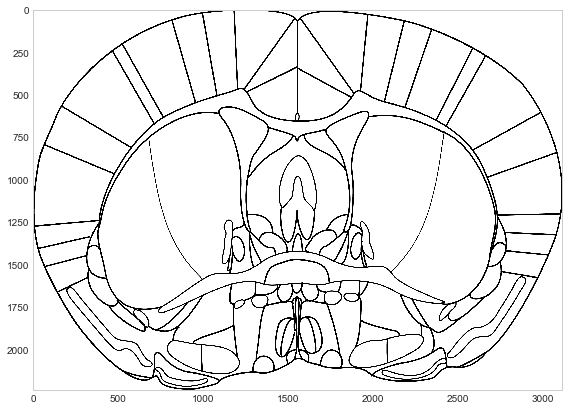

In [3]:
plt.figure(figsize=(10,7))
plt.imshow(template, cmap='gray')
plt.grid('off')
plt.show()

In [4]:
# ret,mask = cv2.threshold(template,10,255,0)

In [5]:
mask_inv = cv2.bitwise_not(template)

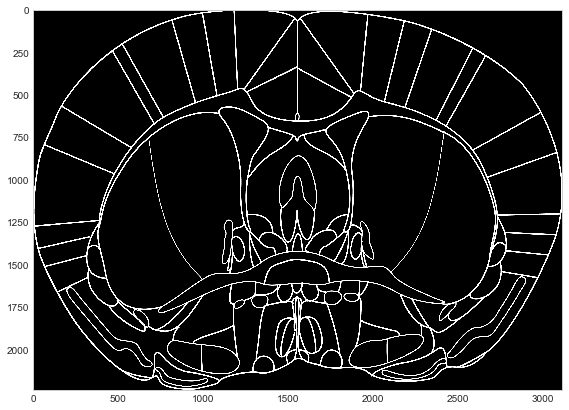

In [6]:
plt.figure(figsize=(10,7))
plt.imshow(mask_inv, cmap='gray')
plt.grid('off')
plt.show()

In [269]:
img_color = cv2.imread('../Data/20170914_D2CreAi14_M527_G_RB_pDMS_S1P2_R1C3_001.tif')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

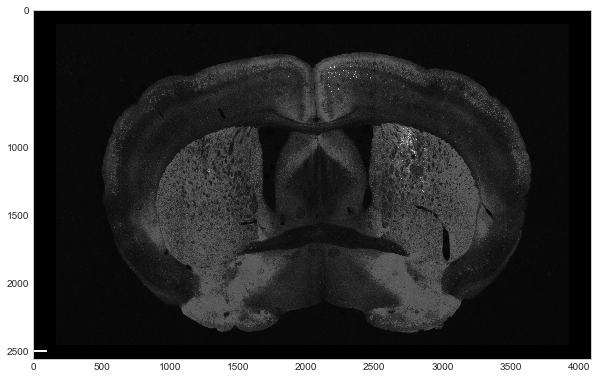

In [270]:
plt.figure(figsize=(10,7))
plt.imshow(img,cmap = 'gray')
plt.grid('off')
plt.show()

In [223]:
# Apply gaussian filter to smooth the stained image
img = cv2.GaussianBlur(img, (5,5), 10)

# Morphological transforms for filling empty stain spaces
kernel = np.ones((3,3),np.uint8)
# img = cv2.erode(img, kernel, iterations = 3)
img = cv2.dilate(img, kernel, iterations = 10)

In [224]:
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# img = cv2.filter2D(img, -1, kernel)

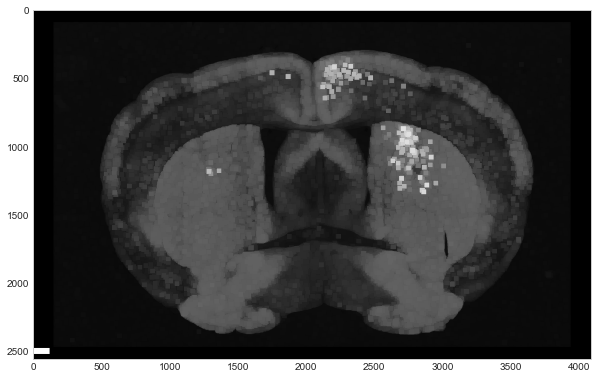

In [225]:
plt.figure(figsize=(10,7))
plt.imshow(img,cmap = 'gray')
plt.grid('off')
plt.show()

In [250]:
# Extract edges using Canny edge detector
edges = cv2.Canny(img,20,30)

# Morphological transforms for filling empty stain spaces
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges, kernel, iterations = 2)
edges = cv2.erode(edges, kernel, iterations = 1)


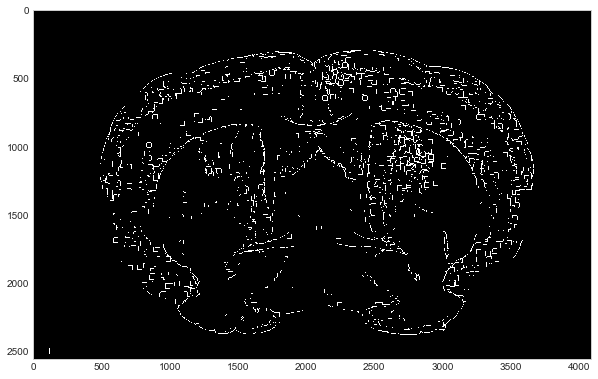

In [251]:
plt.figure(figsize=(10,7))
plt.imshow(edges,cmap = 'gray')
plt.grid('off')
plt.show()

In [294]:
ret,thresh = cv2.threshold(img,10,255,cv2.THRESH_BINARY)
cont_img, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [295]:
area = cv2.contourArea(cont_img)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:320: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function contourArea


In [297]:
epsilon = 0.1*cv2.arcLength(cont_img,True)
approx = cv2.approxPolyDP(cont_img,epsilon,True)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:285: error: (-215) count >= 0 && (depth == CV_32F || depth == CV_32S) in function arcLength


In [272]:
np.unique(img)

array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [258]:
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img_color,(x1,y1),(x2,y2),(0,0,255),30)

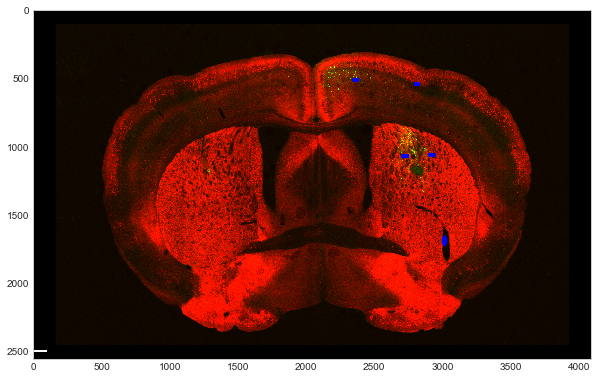

In [259]:
plt.figure(figsize=(10,7))
plt.imshow(img_color)
plt.grid('off')
plt.show()

In [260]:
img_hull = cv2.convexHull(img)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/convhull.cpp:136: error: (-215) total >= 0 && (depth == CV_32F || depth == CV_32S) in function convexHull
